In [1]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt
from pathlib import Path

ROOT_OUTPUT_DIR = Path(r"C:\Users\AviGoyal\Documents\LightingStudio")

In [2]:
df = pd.read_csv(ROOT_OUTPUT_DIR / "tmp" / "source" / "1k_database.csv")

In [3]:
# First, let's examine the structure of the dataframe
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
df.head()



Dataset shape: (5, 6)

Column names: ['name', 'categories', 'tags', 'resolution', 'format', 'file_url']

First few rows:


,name,categories,tags,resolution,format,file_url
0,Abandoned Bakery,"['natural light', 'artificial light', 'urban',...","['abandoned', 'empty', 'industrial', 'windows'...",1k,exr,https://dl.polyhaven.org/file/ph-assets/HDRIs/...
1,Abandoned Church,"['outdoor', 'nature', 'morning-afternoon', 'pa...","['tree', 'autumn', 'church', 'abandoned', 'lea...",1k,exr,https://dl.polyhaven.org/file/ph-assets/HDRIs/...
2,Abandoned Construction,"['indoor', 'urban', 'natural light', 'medium c...","['brick', 'pillar', 'warehouse', 'rubble', 'ab...",1k,exr,https://dl.polyhaven.org/file/ph-assets/HDRIs/...
3,Abandoned Factory Canteen 01,"['indoor', 'urban', 'low contrast', 'natural l...","['hall', 'abandoned', 'fluorescent', 'industri...",1k,exr,https://dl.polyhaven.org/file/ph-assets/HDRIs/...
4,Abandoned Factory Canteen 02,"['indoor', 'urban', 'natural light', 'medium c...","['hall', 'abandoned', 'industrial', 'boxes', '...",1k,exr,https://dl.polyhaven.org/file/ph-assets/HDRIs/...


In [17]:
# Parse the string representations of lists into actual lists
df['categories_parsed'] = df['categories'].apply(ast.literal_eval)
df['tags_parsed'] = df['tags'].apply(ast.literal_eval)

# Examine the first few parsed entries
print("Sample categories:", df['categories_parsed'].iloc[0])
print("Sample tags:", df['tags_parsed'].iloc[0])
print("\nNumber of categories per row (first 10):")
print([len(cats) for cats in df['categories_parsed'].head(10)])
print("\nNumber of tags per row (first 10):")
print([len(tags) for tags in df['tags_parsed'].head(10)])

Sample categories: ['natural light', 'artificial light', 'urban', 'indoor', 'high contrast']
Sample tags: ['abandoned', 'empty', 'industrial', 'windows', 'bare', 'rubble', 'brick', 'concrete', 'backplates']

Number of categories per row (first 10):
[5, 6, 5, 4, 4]

Number of tags per row (first 10):
[9, 5, 10, 6, 5]


In [18]:
# Statistics about the number of labels per row
print("=== CATEGORIES STATISTICS ===")
categories_per_row = df['categories_parsed'].apply(len)
print(f"Min categories per row: {categories_per_row.min()}")
print(f"Max categories per row: {categories_per_row.max()}")
print(f"Mean categories per row: {categories_per_row.mean():.2f}")
print(f"Median categories per row: {categories_per_row.median()}")

print("\n=== TAGS STATISTICS ===")  
tags_per_row = df['tags_parsed'].apply(len)
print(f"Min tags per row: {tags_per_row.min()}")
print(f"Max tags per row: {tags_per_row.max()}")
print(f"Mean tags per row: {tags_per_row.mean():.2f}")
print(f"Median tags per row: {tags_per_row.median()}")



=== CATEGORIES STATISTICS ===
Min categories per row: 4
Max categories per row: 6
Mean categories per row: 4.80
Median categories per row: 5.0

=== TAGS STATISTICS ===
Min tags per row: 5
Max tags per row: 10
Mean tags per row: 7.00
Median tags per row: 6.0


In [19]:
# Distribution of label counts
print("=== DISTRIBUTION OF LABEL COUNTS ===")
print("Categories per row distribution:")
print(categories_per_row.value_counts().sort_index())
print("\nTags per row distribution:")
print(tags_per_row.value_counts().sort_index())

=== DISTRIBUTION OF LABEL COUNTS ===
Categories per row distribution:
categories_parsed
4    2
5    2
6    1
Name: count, dtype: int64

Tags per row distribution:
tags_parsed
5     2
6     1
9     1
10    1
Name: count, dtype: int64


In [20]:
# Get frequency of individual categories and tags
print("=== MOST COMMON CATEGORIES ===")
all_categories = [cat for cat_list in df['categories_parsed'] for cat in cat_list]
category_counts = Counter(all_categories)
print(f"Total unique categories: {len(category_counts)}")
print("Top 20 most common categories:")
for category, count in category_counts.most_common(20):
    print(f"  {category}: {count} ({count/len(df)*100:.1f}%)")

print("\n=== MOST COMMON TAGS ===")
all_tags = [tag for tag_list in df['tags_parsed'] for tag in tag_list]
tag_counts = Counter(all_tags)
print(f"Total unique tags: {len(tag_counts)}")
print("Top 20 most common tags:")
for tag, count in tag_counts.most_common(20):
    print(f"  {tag}: {count} ({count/len(df)*100:.1f}%)")

=== MOST COMMON CATEGORIES ===
Total unique categories: 12
Top 20 most common categories:
  natural light: 5 (100.0%)
  urban: 4 (80.0%)
  indoor: 4 (80.0%)
  low contrast: 2 (40.0%)
  medium contrast: 2 (40.0%)
  artificial light: 1 (20.0%)
  high contrast: 1 (20.0%)
  outdoor: 1 (20.0%)
  nature: 1 (20.0%)
  morning-afternoon: 1 (20.0%)
  partly cloudy: 1 (20.0%)
  overcast: 1 (20.0%)

=== MOST COMMON TAGS ===
Total unique tags: 22
Top 20 most common tags:
  abandoned: 5 (100.0%)
  backplates: 4 (80.0%)
  industrial: 3 (60.0%)
  empty: 2 (40.0%)
  rubble: 2 (40.0%)
  brick: 2 (40.0%)
  hall: 2 (40.0%)
  windows: 1 (20.0%)
  bare: 1 (20.0%)
  concrete: 1 (20.0%)
  tree: 1 (20.0%)
  autumn: 1 (20.0%)
  church: 1 (20.0%)
  leaves: 1 (20.0%)
  pillar: 1 (20.0%)
  warehouse: 1 (20.0%)
  debris: 1 (20.0%)
  desolate: 1 (20.0%)
  ruin: 1 (20.0%)
  gloomy: 1 (20.0%)


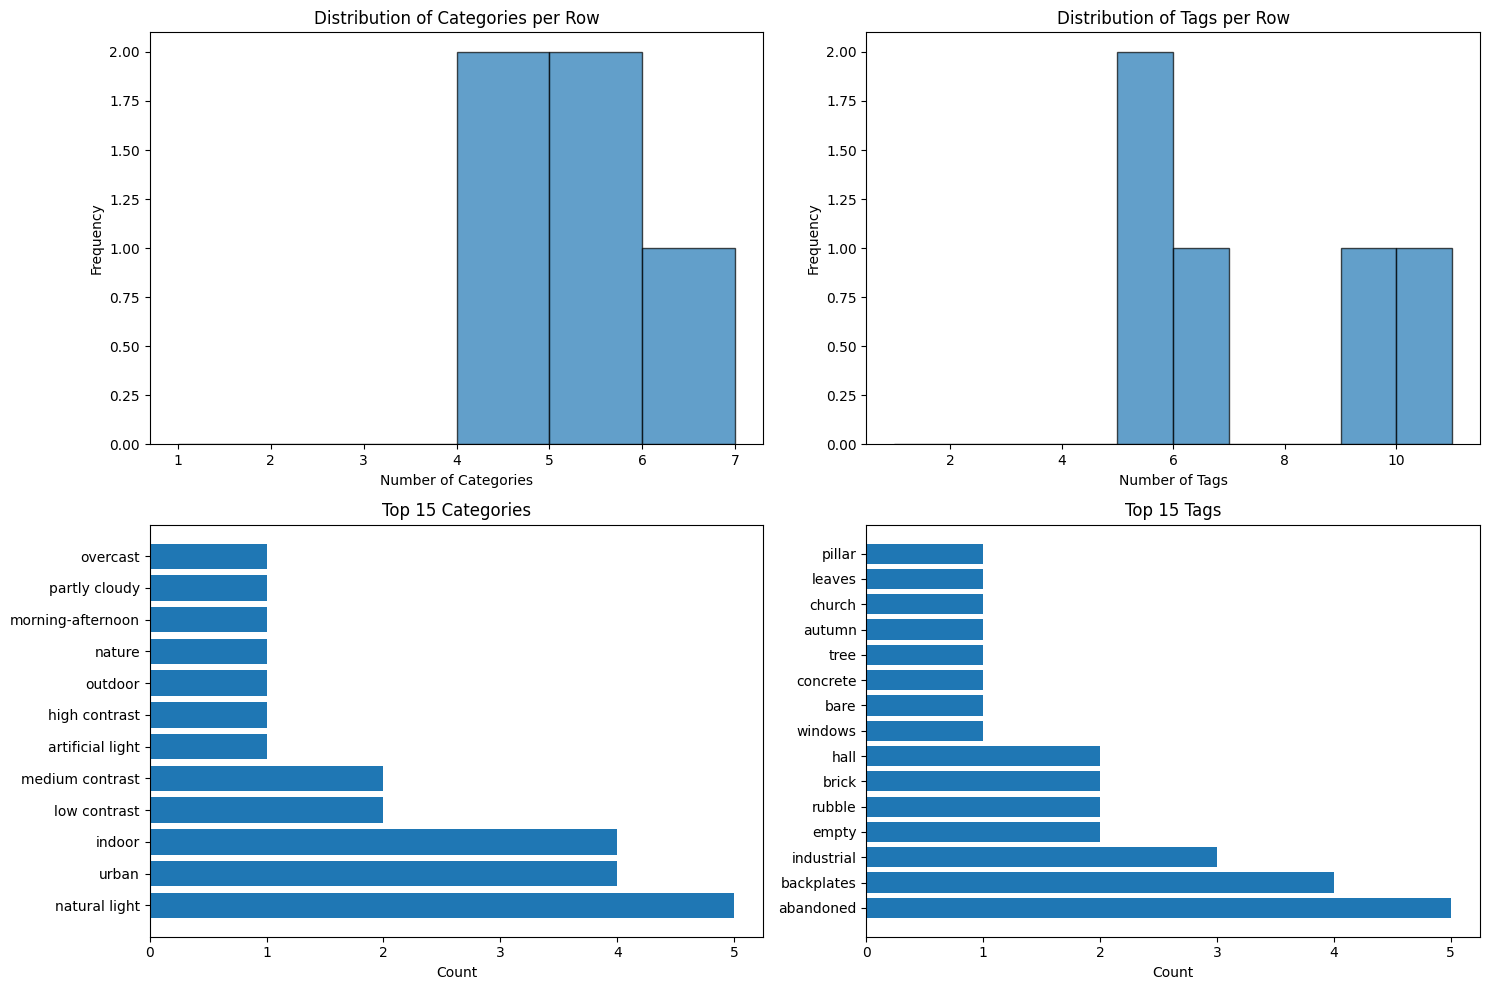

In [21]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Categories per row histogram
axes[0,0].hist(categories_per_row, bins=range(1, categories_per_row.max()+2), alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Categories per Row')
axes[0,0].set_xlabel('Number of Categories')
axes[0,0].set_ylabel('Frequency')

# Tags per row histogram  
axes[0,1].hist(tags_per_row, bins=range(1, min(tags_per_row.max()+2, 20)), alpha=0.7, edgecolor='black')
axes[0,1].set_title('Distribution of Tags per Row')
axes[0,1].set_xlabel('Number of Tags')
axes[0,1].set_ylabel('Frequency')

# Top categories bar chart
top_cats = category_counts.most_common(15)
cat_names, cat_counts = zip(*top_cats)
axes[1,0].barh(range(len(cat_names)), cat_counts)
axes[1,0].set_yticks(range(len(cat_names)))
axes[1,0].set_yticklabels(cat_names)
axes[1,0].set_title('Top 15 Categories')
axes[1,0].set_xlabel('Count')

# Top tags bar chart
top_tags = tag_counts.most_common(15)
tag_names, tag_counts_list = zip(*top_tags)
axes[1,1].barh(range(len(tag_names)), tag_counts_list)
axes[1,1].set_yticks(range(len(tag_names)))
axes[1,1].set_yticklabels(tag_names)
axes[1,1].set_title('Top 15 Tags')
axes[1,1].set_xlabel('Count')

plt.tight_layout()
plt.show()

In [22]:
# Advanced statistics: Label co-occurrence
print("=== LABEL CO-OCCURRENCE ANALYSIS ===")

# Find most common category combinations
from itertools import combinations

# Get combinations of categories that appear together
category_combinations = []
for cats in df['categories_parsed']:
    if len(cats) > 1:
        category_combinations.extend(list(combinations(sorted(cats), 2)))

combo_counts = Counter(category_combinations)
print("Top 10 category combinations:")
for combo, count in combo_counts.most_common(10):
    print(f"  {combo[0]} + {combo[1]}: {count} times")

# Same for tags (but limit to avoid too many combinations)
tag_combinations = []
for tags in df['tags_parsed']:
    if len(tags) > 1:
        # Only take combinations from the first 5 tags to avoid explosion
        limited_tags = tags[:5] if len(tags) > 5 else tags
        tag_combinations.extend(list(combinations(sorted(limited_tags), 2)))

tag_combo_counts = Counter(tag_combinations)
print("\nTop 10 tag combinations:")
for combo, count in tag_combo_counts.most_common(10):
    print(f"  {combo[0]} + {combo[1]}: {count} times")

print("\n" + "="*50)
print("LEAST COMMON CO-OCCURRENCES")
print("="*50)

# Get least common category combinations (appearing only once)
least_common_cats = [(combo, count) for combo, count in combo_counts.items() if count == 1]
print(f"\nCategory combinations that appear only ONCE: {len(least_common_cats)}")
print("Examples of rarest category combinations:")
for combo, count in least_common_cats[:15]:
    print(f"  {combo[0]} + {combo[1]}: {count} time")

# Get least common tag combinations (appearing only once)
least_common_tags = [(combo, count) for combo, count in tag_combo_counts.items() if count == 1]
print(f"\nTag combinations that appear only ONCE: {len(least_common_tags)}")
print("Examples of rarest tag combinations:")
for combo, count in least_common_tags[:15]:
    print(f"  {combo[0]} + {combo[1]}: {count} time")

# Show combinations that appear 2-3 times (still quite rare)
rare_cat_combos = [(combo, count) for combo, count in combo_counts.items() if 2 <= count <= 3]
print(f"\nCategory combinations appearing 2-3 times: {len(rare_cat_combos)}")
print("Examples:")
for combo, count in sorted(rare_cat_combos, key=lambda x: x[1])[:10]:
    print(f"  {combo[0]} + {combo[1]}: {count} times")

rare_tag_combos = [(combo, count) for combo, count in tag_combo_counts.items() if 2 <= count <= 3]
print(f"\nTag combinations appearing 2-3 times: {len(rare_tag_combos)}")
print("Examples:")
for combo, count in sorted(rare_tag_combos, key=lambda x: x[1])[:10]:
    print(f"  {combo[0]} + {combo[1]}: {count} times")


=== LABEL CO-OCCURRENCE ANALYSIS ===
Top 10 category combinations:
  indoor + natural light: 4 times
  indoor + urban: 4 times
  natural light + urban: 4 times
  low contrast + natural light: 2 times
  indoor + medium contrast: 2 times
  medium contrast + natural light: 2 times
  medium contrast + urban: 2 times
  artificial light + high contrast: 1 times
  artificial light + indoor: 1 times
  artificial light + natural light: 1 times

Top 10 tag combinations:
  abandoned + industrial: 3 times
  abandoned + backplates: 2 times
  abandoned + hall: 2 times
  backplates + hall: 2 times
  backplates + industrial: 2 times
  hall + industrial: 2 times
  abandoned + bare: 1 times
  abandoned + empty: 1 times
  abandoned + windows: 1 times
  bare + empty: 1 times

LEAST COMMON CO-OCCURRENCES

Category combinations that appear only ONCE: 27
Examples of rarest category combinations:
  artificial light + high contrast: 1 time
  artificial light + indoor: 1 time
  artificial light + natural light:

In [23]:
# Summary statistics
print("=== DATASET SUMMARY ===")
print(f"Total number of HDRI entries: {len(df)}")
print(f"Total unique categories: {len(category_counts)}")
print(f"Total unique tags: {len(tag_counts)}")
print(f"Average categories per entry: {categories_per_row.mean():.2f}")
print(f"Average tags per entry: {tags_per_row.mean():.2f}")
print(f"Total category instances: {sum(category_counts.values())}")
print(f"Total tag instances: {sum(tag_counts.values())}")

# Most and least diverse entries
print(f"\nMost categories in one entry: {categories_per_row.max()}")
most_cats_idx = categories_per_row.idxmax()
print(f"  Entry: {df.loc[most_cats_idx, 'name']}")
print(f"  Categories: {df.loc[most_cats_idx, 'categories_parsed']}")

print(f"\nMost tags in one entry: {tags_per_row.max()}")
most_tags_idx = tags_per_row.idxmax()
print(f"  Entry: {df.loc[most_tags_idx, 'name']}")
print(f"  Tags: {df.loc[most_tags_idx, 'tags_parsed']}")

# Find rare labels (appearing in less than 1% of entries)
rare_categories = [cat for cat, count in category_counts.items() if count < len(df) * 0.01]
rare_tags = [tag for tag, count in tag_counts.items() if count < len(df) * 0.01]

print(f"\nRare categories (< 1% of entries): {len(rare_categories)}")
print(f"Rare tags (< 1% of entries): {len(rare_tags)}")
print(f"Examples of rare categories: {rare_categories[:10]}")
print(f"Examples of rare tags: {rare_tags[:10]}")

=== DATASET SUMMARY ===
Total number of HDRI entries: 5
Total unique categories: 12
Total unique tags: 22
Average categories per entry: 4.80
Average tags per entry: 7.00
Total category instances: 24
Total tag instances: 35

Most categories in one entry: 6
  Entry: Abandoned Church
  Categories: ['outdoor', 'nature', 'morning-afternoon', 'partly cloudy', 'low contrast', 'natural light']

Most tags in one entry: 10
  Entry: Abandoned Construction
  Tags: ['brick', 'pillar', 'warehouse', 'rubble', 'abandoned', 'debris', 'desolate', 'empty', 'ruin', 'gloomy']

Rare categories (< 1% of entries): 0
Rare tags (< 1% of entries): 0
Examples of rare categories: []
Examples of rare tags: []


In [14]:
import sys
sys.path.append(r"C:\Users\AviGoyal\Documents\LightingStudio\src")

from LightingStudio.ingest.scrape_polyhaven import (
    get_names_by_categories, 
    get_names_by_tags,
    print_label_pools,
    )


In [15]:
# EASY POOLS: Print all categories and tags in readable format
print("=" * 80)
print("ALL AVAILABLE CATEGORIES AND TAGS")
print("=" * 80)
print_label_pools(df)



ALL AVAILABLE CATEGORIES AND TAGS
Total unique categories: 12
artificial light, high contrast, indoor, low contrast, medium contrast, morning-afternoon, natural light, nature, outdoor, overcast, partly cloudy, urban

Total unique tags: 22
abandoned, autumn, backplates, bare, boxes, brick, church, concrete, debris, desolate, empty, fluorescent, gloomy, hall, industrial, leaves, pillar, rubble, ruin, tree, warehouse, windows


In [16]:
# SINGLE CATEGORY/TAG QUERIES: Get names by single category or tag
print("=" * 60)
print("SINGLE CATEGORY/TAG QUERIES")
print("=" * 60)

# Examples with single categories
indoor_names = get_names_by_categories(df, ["indoor"])
print(f"HDRIs with 'indoor' category: {len(indoor_names)}")
print(f"First 10: {indoor_names[:10]}")
print()

outdoor_names = get_names_by_categories(df, ["outdoor"])
print(f"HDRIs with 'outdoor' category: {len(outdoor_names)}")
print(f"First 10: {outdoor_names[:10]}")
print()

# Examples with single tags
abandoned_names = get_names_by_tags(df, ["abandoned"])
print(f"HDRIs with 'abandoned' tag: {len(abandoned_names)}")
print(f"First 10: {abandoned_names[:10]}")
print()

city_names = get_names_by_tags(df, ["city"])
print(f"HDRIs with 'city' tag: {len(city_names)}")
print(f"First 10: {city_names[:10]}")


SINGLE CATEGORY/TAG QUERIES
HDRIs with 'indoor' category: 4
First 10: ['Abandoned Bakery', 'Abandoned Construction', 'Abandoned Factory Canteen 01', 'Abandoned Factory Canteen 02']

HDRIs with 'outdoor' category: 1
First 10: ['Abandoned Church']

HDRIs with 'abandoned' tag: 5
First 10: ['Abandoned Bakery', 'Abandoned Church', 'Abandoned Construction', 'Abandoned Factory Canteen 01', 'Abandoned Factory Canteen 02']

HDRIs with 'city' tag: 0
First 10: []


In [17]:
# MULTIPLE CATEGORIES/TAGS QUERIES: Get names that satisfy ALL conditions (AND logic)
print("=" * 60)
print("MULTIPLE CATEGORIES/TAGS QUERIES (AND logic)")
print("=" * 60)

# Multiple categories - must have ALL specified categories
indoor_urban_names = get_names_by_categories(df, ["indoor", "urban"])
print(f"HDRIs with BOTH 'indoor' AND 'urban' categories: {len(indoor_urban_names)}")
print(f"Names: {indoor_urban_names[:15]}")
print()

outdoor_nature_names = get_names_by_categories(df, ["outdoor", "nature"])
print(f"HDRIs with BOTH 'outdoor' AND 'nature' categories: {len(outdoor_nature_names)}")
print(f"First 10: {outdoor_nature_names[:10]}")
print()

# Multiple tags - must have ALL specified tags
abandoned_graffiti_names = get_names_by_tags(df, ["abandoned", "graffiti"])
print(f"HDRIs with BOTH 'abandoned' AND 'graffiti' tags: {len(abandoned_graffiti_names)}")
print(f"Names: {abandoned_graffiti_names}")
print()

tree_autumn_names = get_names_by_tags(df, ["tree", "autumn"])
print(f"HDRIs with BOTH 'tree' AND 'autumn' tags: {len(tree_autumn_names)}")
print(f"Names: {tree_autumn_names}")


MULTIPLE CATEGORIES/TAGS QUERIES (AND logic)
HDRIs with BOTH 'indoor' AND 'urban' categories: 4
Names: ['Abandoned Bakery', 'Abandoned Construction', 'Abandoned Factory Canteen 01', 'Abandoned Factory Canteen 02']

HDRIs with BOTH 'outdoor' AND 'nature' categories: 1
First 10: ['Abandoned Church']

HDRIs with BOTH 'abandoned' AND 'graffiti' tags: 0
Names: []

HDRIs with BOTH 'tree' AND 'autumn' tags: 1
Names: ['Abandoned Church']


In [18]:
# COMBINED CATEGORY + TAG QUERIES: Get names that satisfy both category AND tag conditions
print("=" * 60)
print("COMBINED CATEGORY + TAG QUERIES")
print("=" * 60)

# Combine category and tag filters using set intersection
indoor_category_names = set(get_names_by_categories(df, ["indoor"]))
abandoned_tag_names = set(get_names_by_tags(df, ["abandoned"]))
indoor_abandoned_names = sorted(indoor_category_names & abandoned_tag_names)

print(f"HDRIs with 'indoor' category AND 'abandoned' tag: {len(indoor_abandoned_names)}")
print(f"Names: {indoor_abandoned_names}")
print()

# Another example
outdoor_category_names = set(get_names_by_categories(df, ["outdoor"]))
tree_tag_names = set(get_names_by_tags(df, ["tree"]))
outdoor_tree_names = sorted(outdoor_category_names & tree_tag_names)

print(f"HDRIs with 'outdoor' category AND 'tree' tag: {len(outdoor_tree_names)}")
print(f"First 10: {outdoor_tree_names[:10]}")
print()

# Complex example: multiple categories AND multiple tags
high_contrast_natural = set(get_names_by_categories(df, ["high contrast", "natural light"]))
city_modern = set(get_names_by_tags(df, ["city", "modern"]))
complex_query_names = sorted(high_contrast_natural & city_modern)

print(f"HDRIs with 'high contrast' + 'natural light' categories AND 'city' + 'modern' tags: {len(complex_query_names)}")
print(f"Names: {complex_query_names}")


COMBINED CATEGORY + TAG QUERIES
HDRIs with 'indoor' category AND 'abandoned' tag: 4
Names: ['Abandoned Bakery', 'Abandoned Construction', 'Abandoned Factory Canteen 01', 'Abandoned Factory Canteen 02']

HDRIs with 'outdoor' category AND 'tree' tag: 1
First 10: ['Abandoned Church']

HDRIs with 'high contrast' + 'natural light' categories AND 'city' + 'modern' tags: 0
Names: []


In [19]:
# QUICK REFERENCE: How to use these functions
print("=" * 60)
print("QUICK REFERENCE FOR FUTURE USE")
print("=" * 60)

print("""
# 1. Get all available labels:
all_categories = list_all_categories(df)
all_tags = list_all_tags(df)
print_label_pools(df)  # Pretty print all labels

# 2. Single category/tag queries:
names = get_names_by_categories(df, ["indoor"])
names = get_names_by_tags(df, ["abandoned"])

# 3. Multiple categories/tags (AND logic):
names = get_names_by_categories(df, ["indoor", "urban"])  # Must have BOTH
names = get_names_by_tags(df, ["tree", "autumn"])        # Must have BOTH

# 4. Combine categories AND tags:
cat_names = set(get_names_by_categories(df, ["indoor"]))
tag_names = set(get_names_by_tags(df, ["abandoned"]))
combined = sorted(cat_names & tag_names)

# 5. Get details for specific names:
specific_names = ["Abandoned Bakery", "Urban Courtyard"]
details = df[df['name'].isin(specific_names)][['name', 'categories', 'tags']]
print(details)
""")


QUICK REFERENCE FOR FUTURE USE

# 1. Get all available labels:
all_categories = list_all_categories(df)
all_tags = list_all_tags(df)
print_label_pools(df)  # Pretty print all labels

# 2. Single category/tag queries:
names = get_names_by_categories(df, ["indoor"])
names = get_names_by_tags(df, ["abandoned"])

# 3. Multiple categories/tags (AND logic):
names = get_names_by_categories(df, ["indoor", "urban"])  # Must have BOTH
names = get_names_by_tags(df, ["tree", "autumn"])        # Must have BOTH

# 4. Combine categories AND tags:
cat_names = set(get_names_by_categories(df, ["indoor"]))
tag_names = set(get_names_by_tags(df, ["abandoned"]))
combined = sorted(cat_names & tag_names)

# 5. Get details for specific names:
specific_names = ["Abandoned Bakery", "Urban Courtyard"]
details = df[df['name'].isin(specific_names)][['name', 'categories', 'tags']]
print(details)

